<a href="https://colab.research.google.com/github/jinyoungmoonDEV/Academy_Python_DeepLearning/blob/main/%EB%B9%84%ED%8A%B82205_%EB%94%A5%EB%9F%AC%EB%8B%9D_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 및 상태 저장

In [ ]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
test_scaled = test_input/255.0 

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(train_scaled, train_target, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7405 - accuracy: 0.7451 - val_loss: 0.4736 - val_accuracy: 0.8261
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5099 - accuracy: 0.8204 - val_loss: 0.4184 - val_accuracy: 0.8459
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4651 - accuracy: 0.8353 - val_loss: 0.4025 - val_accuracy: 0.8487
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4429 - accuracy: 0.8400 - val_loss: 0.3907 - val_accuracy: 0.8552
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4260 - accuracy: 0.8483 - val_loss: 0.3783 - val_accuracy: 0.8597
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4148 - accuracy: 0.8509 - val_loss: 0.3632 - val_accuracy: 0.8668
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4039 - accuracy: 0.8554 - val_loss: 0.3534 - val_accuracy:

In [ ]:
model.save_weights('model-weights.h5')

In [ ]:
model.save('model-whole.h5')

In [ ]:
!ls -al

total 1304
drwxr-xr-x 1 root root   4096 May 18 00:28 .
drwxr-xr-x 1 root root   4096 May 18 00:15 ..
drwxr-xr-x 4 root root   4096 May 16 13:23 .config
-rw-r--r-- 1 root root 333448 May 18 00:28 model-weights.h5
-rw-r--r-- 1 root root 982664 May 18 00:28 model-whole.h5
drwxr-xr-x 1 root root   4096 May 16 13:24 sample_data


In [ ]:
import sys
print(sys.path)

['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
model2 = keras.models.load_model('model-whole.h5')
model2.summary()

In [ ]:
print(model2.weights)

In [ ]:
model2.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.3511 - accuracy: 0.8748


[0.35112297534942627, 0.8748000264167786]

# 콜백

호출 방향이 반대

In [ ]:
def add(a,b):
  print(f"add:{a},{b}")
  return a+b

In [ ]:
def sub(a,b):
  print(f"add:{a},{b}")
  return a+b

In [ ]:
def doall(ls1,ls2,fn):
  s=[]
  for i in range(len(ls1)):
    s.append(fn(ls1[i],ls2[i]))
  return s

In [ ]:
re = doall([1,2,3],[4,5,6],add)
print(re)

add:1,4
add:2,5
add:3,6
[5, 7, 9]


In [ ]:
re = doall([1,2,3],[4,5,6],sub)
print(re)

add:1,4
add:2,5
add:3,6
[5, 7, 9]


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
hist = model.fit(train_scaled, train_target, epochs=30, validation_split=0.2,callbacks=[checkpoint_cb])

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7403 - accuracy: 0.7448 - val_loss: 0.4800 - val_accuracy: 0.8253
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5163 - accuracy: 0.8170 - val_loss: 0.4246 - val_accuracy: 0.8421
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4700 - accuracy: 0.8328 - val_loss: 0.3982 - val_accuracy: 0.8539
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4449 - accuracy: 0.8422 - val_loss: 0.3812 - val_accuracy: 0.8622
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4275 - accuracy: 0.8469 - val_loss: 0.3747 - val_accuracy: 0.8610
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4128 - accuracy: 0.8519 - val_loss: 0.3660 - val_accuracy: 0.8661
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4024 - accuracy: 0.8559 - val_loss: 0.3572 - val_accuracy:

In [ ]:
model3 = keras.models.load_model('best-model.h5')
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8808


[0.3426574766635895, 0.8808000087738037]

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True) #5회연속으로 베스트 점수가 않나오면 오버피팅 되기전 멈추기
hist = model.fit(train_scaled, train_target, epochs=1500, validation_split=0.2,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/1500
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7355 - accuracy: 0.7444 - val_loss: 0.4769 - val_accuracy: 0.8288
Epoch 2/1500
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5144 - accuracy: 0.8184 - val_loss: 0.4326 - val_accuracy: 0.8430
Epoch 3/1500
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4662 - accuracy: 0.8332 - val_loss: 0.3978 - val_accuracy: 0.8503
Epoch 4/1500
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4437 - accuracy: 0.8413 - val_loss: 0.3842 - val_accuracy: 0.8566
Epoch 5/1500
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4269 - accuracy: 0.8484 - val_loss: 0.3736 - val_accuracy: 0.8608
Epoch 6/1500
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4148 - accuracy: 0.8513 - val_loss: 0.3629 - val_accuracy: 0.8687
Epoch 7/1500
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4018 - accuracy: 0.8556 - val_loss: 0.3586 -

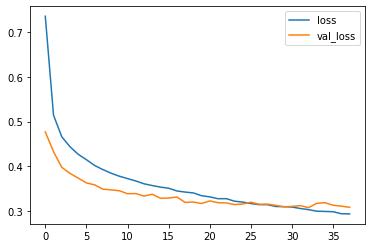

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

# CNN

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

In [ ]:
train_input.shape

(60000, 28, 28)

In [ ]:
train_rinput = train_input.reshape(-1,28,28,1)
test_rinput = test_input.reshape(-1,28,28,1)
train_rinput.shape

(60000, 28, 28, 1)

In [ ]:
train_scaled = train_rinput/255.0 #min-max 변환
test_scaled = test_rinput/255.0 #min-max 변환

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_10 (Dense)            (None, 100)              

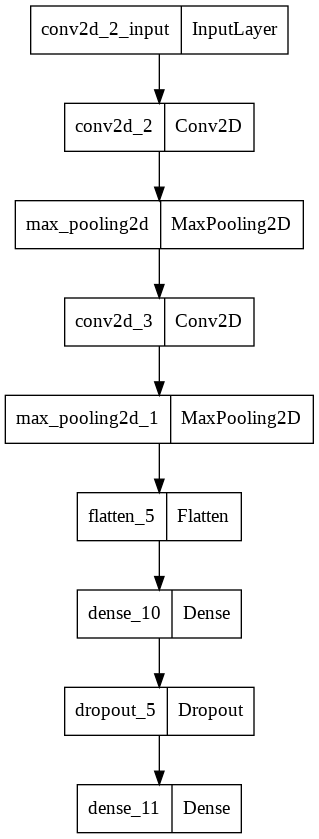

In [ ]:
keras.utils.plot_model(model)

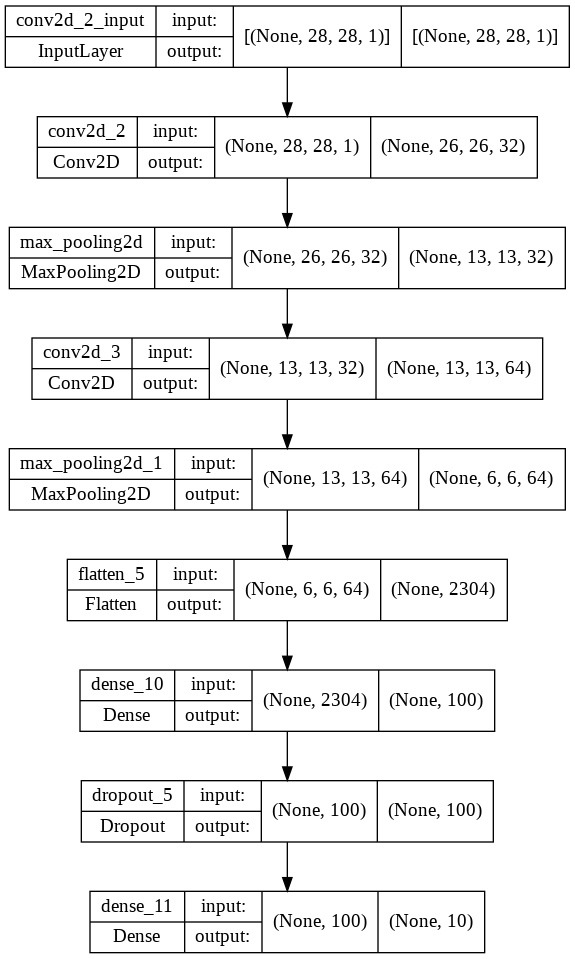

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
history = model.fit(train_scaled, train_target, validation_split=0.2,epochs=30,callbacks=[early_stopping_cb])

Epoch 1/30
1500/1500 [==============================] - 62s 41ms/step - loss: 0.5584 - accuracy: 0.8033 - val_loss: 0.3588 - val_accuracy: 0.8655
Epoch 2/30
1500/1500 [==============================] - 59s 39ms/step - loss: 0.3773 - accuracy: 0.8668 - val_loss: 0.3155 - val_accuracy: 0.8844
Epoch 3/30
1500/1500 [==============================] - 58s 39ms/step - loss: 0.3216 - accuracy: 0.8838 - val_loss: 0.2685 - val_accuracy: 0.8962
Epoch 4/30
1500/1500 [==============================] - 61s 40ms/step - loss: 0.2969 - accuracy: 0.8930 - val_loss: 0.2500 - val_accuracy: 0.9058
Epoch 5/30
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2669 - accuracy: 0.9011 - val_loss: 0.2448 - val_accuracy: 0.9094
Epoch 6/30
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2508 - accuracy: 0.9084 - val_loss: 0.2386 - val_accuracy: 0.9112
Epoch 7/30
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2305 - accuracy: 0.9146 - val_loss: 0.2334 -

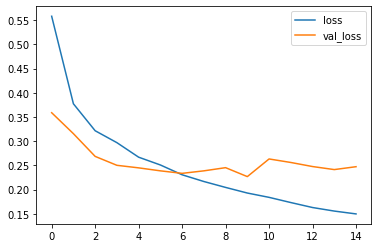

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2468 - accuracy: 0.9133


[0.2468213587999344, 0.9132999777793884]

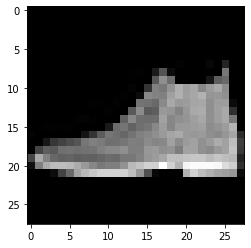

9


In [ ]:
plt.imshow(test_scaled[0].reshape(28,28),cmap='gray')
plt.show()
print(test_target[0])

In [ ]:
preds = model.predict(test_scaled[0:1])
print(preds)

[[1.6367604e-12 3.6001973e-18 4.3801556e-16 3.9614438e-13 9.6776784e-20
  3.0443392e-09 6.5871097e-18 7.9298816e-06 5.9012754e-16 9.9999201e-01]]


In [ ]:
model.save('best-cnn-model.h5')

In [ ]:
model.layers

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.03453575 0.28130174


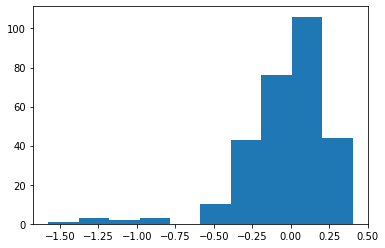

In [ ]:
plt.hist(conv_weights.reshape(-1,1))
plt.show()

TypeError: ignored

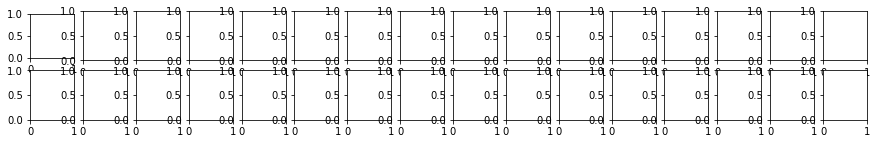

In [ ]:
fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:0,i*16 + j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(100,activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(10,activation='softmax'))
model2.summary()
model2.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dense_12 (Dense)            (None, 100)              

(3, 3, 1, 32) (3, 3, 1, 32)


TypeError: ignored

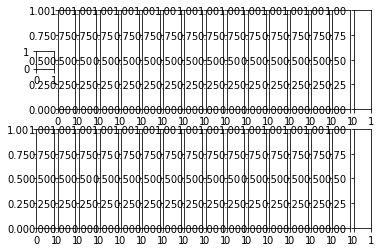

In [ ]:
conv2 = model2.layers[0]
print(conv2.weights[0].shape, conv2.weights[0].shape)
fig,axs = plt.subplots(2,16)
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:0,i*16 + j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.coef_=np.random.uniform(0,1)
print(lr.coef_)

0.28724047459335733


In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [ ]:
print(model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv2d_2/Relu:0', description="created by layer 'conv2d_2'")


In [ ]:
conv_acti = keras.Model(model.input,model.layers[0].output)
print(conv_acti)

In [ ]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
inputs.shape

(1, 28, 28, 1)

In [ ]:
train_scaled[0:1].shape

(1, 28, 28, 1)

In [ ]:
feature_maps = conv_acti.predict(inputs)

In [ ]:
print(feature_maps.shape)

(1, 26, 26, 32)


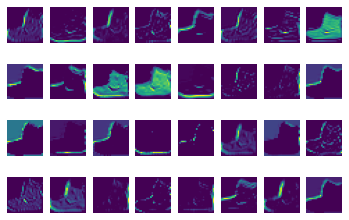

In [ ]:
fig,axs = plt.subplots(4,8)
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

# OpenCV

HSV
색조,체도,명도

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
image=np.zeros((100,255,3),np.uint8) #ch수=3 ,음수X

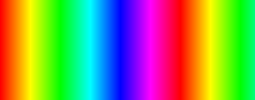

In [ ]:
for i in range(0,180):
  image[:,i,0]=i #ch0
image[:,:,1]=255
image[:,:,2]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

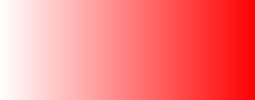

In [ ]:
image=np.zeros((100,255,3),np.uint8)
image[:,:,0]=0
for i in range(0,255):
  image[:,i,1]=i 
image[:,:,2]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

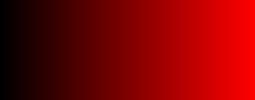

In [ ]:
image=np.zeros((100,255,3),np.uint8)
image[:,:,0]=0
for i in range(0,255):
  image[:,i,2]=i 
image[:,:,1]=255
img = cv2.cvtColor(image,cv2.COLOR_HSV2BGR)
cv2_imshow(img)

In [ ]:
path = '/content/KakaoTalk_20220518_141744196.png'
src_image = cv2.imread(path,cv2.IMREAD_COLOR)
cv2_imshow(src_image)

In [ ]:
cpy_image = src_image.copy()
gray_image = cv2.cvtColor(src_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [ ]:
src_image.shape, gray_image.shape

((259, 532, 3), (259, 532))

In [ ]:
blur_image = cv2.GaussianBlur(gray_image,(3,3),0)
cv2_imshow(blur_image)

In [ ]:
canny_image = cv2.Canny(blur_image,100,200)
cv2_imshow(canny_image)

In [ ]:
contours, _ = cv2.findContours(canny_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
store_xywh=[]
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  flag = False
  if w>30 and h>=40:
    for sv in store_xywh:
      gx = abs(sv[0]-x)
      gy = abs(sv[1]-y)
      if gx<5 and gy<5:
        flag = True
        break
  else:
    flag = True
  if flag == False:
    store_xywh.append([x,y,w,h])
for sv in store_xywh:
  print(sv)

[414, 166, 49, 53]
[137, 164, 35, 61]
[39, 158, 42, 73]
[216, 151, 39, 72]
[317, 144, 43, 89]
[123, 49, 66, 43]
[421, 47, 75, 48]
[55, 46, 36, 58]
[218, 38, 45, 55]
[321, 37, 64, 66]


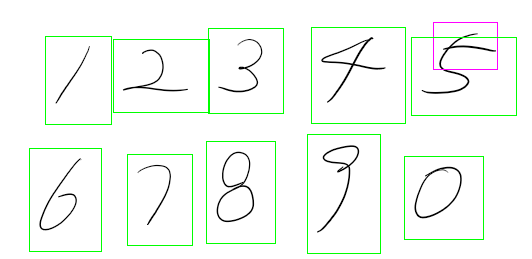

In [ ]:
for sv in store_xywh:
  x,y,w,h = sv
  cv2.rectangle(src_image,(x-10,y-10),(x+w+20,y+h+20),(0,255,0),1)
cv2_imshow(src_image)

# 손글씨

In [ ]:
(image_train,label_train),(image_test,label_test) = keras.datasets.mnist.load_data()
print(image_train.shape)

(60000, 28, 28)


In [ ]:
np.unique(label_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
image_train2 = image_train.reshape(-1,28*28)
image_test2 = image_test.reshape(-1,28*28)

In [ ]:
from sklearn import svm #앙상블만큼 잘나옴

In [ ]:
svm = svm.SVC() #svm의 분류 모델 생성
svm.fit(image_train2,label_train)

SVC()

In [ ]:
pval = svm.predict(image_test2)

In [ ]:
from sklearn import metrics
score = metrics.accuracy_score(pval,label_test)
print(score)

0.9792


In [ ]:
from keras.utils import  np_utils
label_train2 =  np_utils.to_categorical(label_train)
label_test2 =  np_utils.to_categorical(label_test)
print(label_train[0])
print(label_train2[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
scaled_train = image_train/255.0
scaled_train = image_test/255.0

In [ ]:
from keras import layers,models
model = models.Sequential()
model.add(layers.Dense(100,activation='relu',input_shape=(784,)))
#model.add(layers.Dense(28,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
history = model.fit(image_train2,label_train2,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5511 - accuracy: 0.8725
Epoch 2/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5749 - accuracy: 0.9233
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4919 - accuracy: 0.9395
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4562 - accuracy: 0.9456
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4163 - accuracy: 0.9503
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3978 - accuracy: 0.9550
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3669 - accuracy: 0.9582
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3624 - accuracy: 0.9605
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3672 - accuracy: 0.9628
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - l

In [ ]:
score=model.evaluate(image_test2,label_test2)
print(score)

313/313 [==============================] - 1s 2ms/step - loss: 2.4069 - accuracy: 0.9641
[2.4069037437438965, 0.9641000032424927]
